In [1]:
import pandas as pd
import numpy as np

In [6]:
#1
test = pd.read_csv("test.csv")
myDF = pd.DataFrame(test)

In [7]:
#2 print first three rows
myDF.iloc[:3,:]

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


In [8]:
#3 Delete 'Model' column from the DF temp
myDF.drop('Model', inplace=False, axis =1)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
3,40,156,44,Q,RHRHJY,[89$],Asia
4,50,468,33,J,HPQCMC,[95$],Africa
...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,[51$],South America
946,9470,316,46,L,SHBAUD,[33$],North America
947,9480,461,46,K,PUZUVO,[12$],Europe
948,9490,185,13,N,UMESZO,[39$],North America


In [9]:
#4 
#Column will not be deleted permanetly without inplace

In [10]:
#5 Del row 1,3,5 permanetly 
myDF.drop([1,3,5], axis=0, inplace=True)
myDF.head()

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
4,50,468,33,J,HPQCMC,QX90,[95$],Africa
6,70,327,24,F,NLVQPY,JY72,[25$],Europe
7,80,495,50,Z,DLUMAX,DU50,[70$],Antarctica


In [11]:
#6 Calculate the mean of 'Range' 
df_mean = myDF["Range"].mean()
print(df_mean)

297.53326293558604


In [12]:
#7 How many 'F' do we have in the 'Type' column? Replace them with 'AAA' PERMANENTLY
num_f = myDF[myDF.Type == 'F'].shape[0]
print(num_f)
print(len(myDF[myDF['Type'] == 'F']))

50
50


In [13]:
myDF.loc[(myDF.Type == 'F'), 'Type'] = 'AAA'
myDF.head()

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,AAA,NXEYEM,EX85,[56$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America
4,50,468,33,J,HPQCMC,QX90,[95$],Africa
6,70,327,24,AAA,NLVQPY,JY72,[25$],Europe
7,80,495,50,Z,DLUMAX,DU50,[70$],Antarctica


In [14]:
#8 Get rid of the [, $ and ] from the ‘Cost’ column permanently and display the first 5 rows. What is the type of ‘Cost’ column after this
myDF['Cost'] = myDF['Cost'].str.replace('[$]','')
myDF['Cost'] = myDF['Cost'].apply(lambda x: x.replace('[','').replace(']', ''))
#9 Convert the string columns to int
myDF['Cost'] = myDF['Cost'].astype(int)
myDF.head()

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,AAA,NXEYEM,EX85,56,Asia
2,30,378,28,X,IMGMFY,VN81,90,North America
4,50,468,33,J,HPQCMC,QX90,95,Africa
6,70,327,24,AAA,NLVQPY,JY72,25,Europe
7,80,495,50,Z,DLUMAX,DU50,70,Antarctica


In [15]:
#10 Calculate the average of ‘Cost’ column. Then, calculate the average of ‘Cost’ for each ‘Continent’

myDF.groupby('Continent')['Cost'].mean()

Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.279070
Australia        56.838028
Europe           53.258993
North America    55.006993
South America    53.162963
Name: Cost, dtype: float64

In [16]:
#11 Calculate the min, max and standard deviation of the ‘Cost’ column, group by each ‘Continent’, all in one command.
myDF.groupby('Continent')['Cost'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent,,,,,,,,
Africa,143.0,54.741259,25.961432,11.0,34.00,54.0,78.0,97.0
Antarctica,116.0,54.706897,24.880590,10.0,35.00,59.0,74.0,97.0
Asia,129.0,54.279070,26.109737,10.0,33.00,54.0,74.0,99.0
Australia,142.0,56.838028,26.057121,10.0,36.25,56.5,81.0,97.0
Europe,139.0,53.258993,26.185054,10.0,29.00,54.0,73.0,99.0
North America,143.0,55.006993,25.664821,10.0,33.50,56.0,78.5,99.0
South America,135.0,53.162963,25.724780,10.0,31.00,55.0,74.5,98.0


In [17]:
#12 Calculate the min, max and standard deviation of all numerical columns, group by each ‘Continent’, all in one command.
myDF.groupby('Continent').describe()

ID                                                           \
               count         mean          std    min     25%     50%     75%   
Continent                                                                       
Africa         143.0  4797.692308  2614.387519   50.0  2680.0  4900.0  7115.0   
Antarctica     116.0  4569.310345  2936.313786   80.0  1887.5  4455.0  7330.0   
Asia           129.0  4334.031008  2683.431665   10.0  2040.0  4040.0  6680.0   
Australia      142.0  4677.323944  2793.945560  120.0  2242.5  4590.0  6992.5   
Europe         139.0  5078.848921  2623.991892   70.0  3065.0  4970.0  7295.0   
North America  143.0  4906.783217  2841.216413   30.0  2375.0  4820.0  7580.0   
South America  135.0  4963.851852  2656.186804   90.0  2910.0  5070.0  6975.0   

                       Range              ... Value         Cost             \
                  max  count        mean  ...   75%   max  count       mean   
Continent                                 ...                                 
Africa         9450.0  143.0  282.475524  ...  42.0  50.0  143.0  54.741259   
Antarctica     9370.0  116.0  288.698276  ...  39.0  50.0  116.0  54.706897   
Asia           9390.0  129.0  284.914729  ...  36.0  50.0  129.0  54.279070   
Australia      9410.0  142.0  305.894366  ...  42.0  50.0  142.0  56.838028   
Europe         9480.0  139.0  320.338129  ...  42.0  50.0  139.0  53.258993   
North America  9490.0  143.0  299.832168  ...  42.0  50.0  143.0  55.006993   
South America  9500.0  135.0  298.422222  ...  41.0  50.0  135.0  53.162963   

                                                         
                     std   min    25%   50%   75%   max  
Continent                                                
Africa         25.961432  11.0  34.00  54.0  78.0  97.0  
Antarctica     24.880590  10.0  35.00  59.0  74.0  97.0  
Asia           26.109737  10.0  33.00  54.0  74.0  99.0  
Australia      26.057121  10.0  36.25  56.5  81.0  97.0  
Europe         26.185054  10.0  29.00  54.0  73.0  99.0  
North America  25.664821  10.0  33.50  56.0  78.5  99.0  
South America  25.724780  10.0  31.00  55.0  74.5  98.0  

[7 rows x 32 columns]

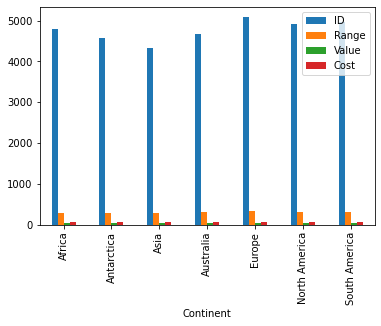

In [18]:
#13 Illustrate the mean of all numerical columns, group by the ‘Continent’, using a ‘bar’ chart.

barDF=myDF.groupby('Continent').mean()
barDF.plot.bar()

In [19]:
#14 Count the number of each continent in the ‘Continent’ column.
myDF['Continent'].value_counts()

Africa           143
North America    143
Australia        142
Europe           139
South America    135
Asia             129
Antarctica       116
Name: Continent, dtype: int64

In [20]:
#15 Show the percentage of each continent in the ‘Continent’ column.
#Cannot perform % operation on a string

In [21]:
#16 Show the unique values that we have in the ‘Continent’ column. Then show the number of unique values that we have in the ‘Continent’ column.

myDF['Continent'].unique()
len(myDF['Continent'].unique())

7

In [22]:
#17 Use the value_count method for the ‘Cost’ column and describe the output as a comment in the next cell, using the # for the comment.
myDF['Cost'].value_counts()

35    20
56    20
73    18
54    17
97    17
      ..
77     5
92     5
94     5
42     3
24     2
Name: Cost, Length: 90, dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


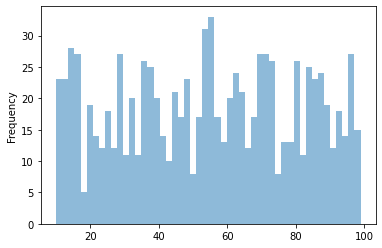

In [23]:
#18 & 19 Plot a histogram for the ‘Cost’ column.Try to change the number of bins to 50 to show the result more accurately.

plot = myDF['Cost'].plot.hist(bins=50, alpha = 0.5)
print(plot)

In [24]:
#20 

myDF['Zip Code'].isnull().sum()
len(myDF['Zip Code']) - myDF.count()
myDF['Type'].isnull().sum()
#There are 9 null/missing values in the 'Zip Code' column and 2 null/missing values in the 'Type' column
myDF.isnull().sum()

ID           0
Range        0
Value        0
Type         2
Zip Code     9
Model        0
Cost         0
Continent    0
dtype: int64

In [25]:
#21 
myDF.dropna() # There are 936 rows

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,AAA,NXEYEM,EX85,56,Asia
2,30,378,28,X,IMGMFY,VN81,90,North America
4,50,468,33,J,HPQCMC,QX90,95,Africa
6,70,327,24,AAA,NLVQPY,JY72,25,Europe
7,80,495,50,Z,DLUMAX,DU50,70,Antarctica
...,...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,NG88,51,South America
946,9470,316,46,L,SHBAUD,IE12,33,North America
947,9480,461,46,K,PUZUVO,HB82,12,Europe
948,9490,185,13,N,UMESZO,WJ90,39,North America


In [26]:
#22 Show the statistics for the ‘Type’ column using the value_count method, including the NaN values in the list. How many missing values do we have?
myDF['Type'].isna().value_counts()

False    945
True       2
Name: Type, dtype: int64

In [27]:
#23 Replace the ‘Type’ column missing values with ‘XXX’ and show the result again.
myDF['Type'].fillna('XXX')

0      AAA
2        X
4        J
6      AAA
7        Z
      ... 
945      C
946      L
947      K
948      N
949      W
Name: Type, Length: 947, dtype: object

In [28]:
#24 Drop the rows that have any missing value permanently and show the number of rows after running the drop command.
myDF.dropna(inplace=True)
myDF.shape

(936, 8)

In [29]:
#25 Set the ‘ID’ column as the new index and delete the index name. Then show the first 5 rows of the DF. Show the value of the cell that its ID is 70 and its column header is ‘Value’.
myDF.set_index('ID')
myDF['ID'][3:]

6        70
7        80
8        90
9       100
10      110
       ... 
945    9460
946    9470
947    9480
948    9490
949    9500
Name: ID, Length: 933, dtype: int64

#26Show the index, columns and the shape of the current DF. Bring back the ID column to the DF and reset the index. Again, show the index, columns and the shape of the current DF.

myDF.index

In [30]:
#26 Show the index, columns and the shape of the current DF. Bring back the ID column to the DF and reset the index. Again, show the index, columns and the shape of the current DF.
myDF.index

Int64Index([  0,   2,   4,   6,   7,   8,   9,  10,  11,  12,
            ...
            940, 941, 942, 943, 944, 945, 946, 947, 948, 949],
           dtype='int64', length=936)

In [31]:
myDF.reset_index()

,index,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,0,10,192,50,AAA,NXEYEM,EX85,56,Asia
1,2,30,378,28,X,IMGMFY,VN81,90,North America
2,4,50,468,33,J,HPQCMC,QX90,95,Africa
3,6,70,327,24,AAA,NLVQPY,JY72,25,Europe
4,7,80,495,50,Z,DLUMAX,DU50,70,Antarctica
...,...,...,...,...,...,...,...,...,...
931,945,9460,136,12,C,HGVBPV,NG88,51,South America
932,946,9470,316,46,L,SHBAUD,IE12,33,North America
933,947,9480,461,46,K,PUZUVO,HB82,12,Europe
934,948,9490,185,13,N,UMESZO,WJ90,39,North America
